## Analitica Avanzada Con PBI

***Proyecto Final - Grupo 3***

**MODELO DE CLASIFICASION.**

#1- Descripcion del set de datos(observaciones, variables, tipo de información)



Observaciones: 272,837

Variables: 25

Tipo de Información:

      Variable                Tipo    Nullos  Dtype    Comentarios
      SK_ID_CURR              C               int64    

      TARGET                  C               int64    Variable Objetivo

      NAME_CONTRACT_TYPE      C               object   

      CODE_GENDER             C               object   

      FLAG_OWN_CAR            C               object   

      FLAG_OWN_REALTY         C               object   

      CNT_CHILDREN            N               int64    

      AMT_INCOME_TOTAL        N               float64  

      AMT_CREDIT              N               float64  
      AMT_ANNUITY             N       11      float64  Se valorara rellenar nulos con la moda

      AMT_GOODS_PRICE         N       253     float64  Se valorara rellenar nulos con la moda

      NAME_TYPE_SUITE         C       1136    object   Se valorara rellenar nulos con la moda

      NAME_INCOME_TYPE        C               object  

      NAME_EDUCATION_TYPE     C               object  

      NAME_FAMILY_STATUS      C               object   

      NAME_HOUSING_TYPE       C               object   

      OWN_CAR_AGE             N       179992  float64  Altos valores nulos, se procedera con su eliminacion.

      FLAG_MOBIL              C               int64  

      FLAG_EMP_PHONE          C               int64

      FLAG_WORK_PHONE         C               int64  

      FLAG_CONT_MOBILE        C               int64    

      FLAG_PHONE              C               int64    

      FLAG_EMAIL              C               int64    
      OCCUPATION_TYPE         C       85164   object   Altos valores nulos, se procedera con su eliminacion.

      CNT_FAM_MEMBERS         N       2       float64  Se analizara dado que deberia ser Int64 y no float64


#Objetivo del Proyecto

El principal objetivo del proyecto es detectar fraudes en transacciones con tarjetas de crédito utilizando técnicas de aprendizaje automático. El objetivo específico es construir un modelo de clasificación que pueda predecir con alta precisión si una transacción es fraudulenta o no, minimizando tanto los falsos positivos como los falsos negativos.

#Estructura de los datos utilizados

Los datos utilizados en este proyecto provienen de un archivo CSV titulado "Fraude tarjetas de credito.csv". La estructura de los datos incluye múltiples variables que describen las transacciones y características del cliente. Algunas de las principales columnas incluyen:
•	TARGET: Variable objetivo que indica si una transacción es fraudulenta (1) o no (0).
•	AMT_INCOME_TOTAL: Ingreso total del cliente.
•	NAME_EDUCATION_TYPE: Nivel educativo del cliente.
•	CODE_GENDER: Género del cliente.
•	AMT_GOODS_PRICE: Precio de los bienes comprados.
•	NAME_TYPE_SUITE: Tipo de acompañante del cliente.
•	Otras variables relacionadas con características personales y transacciones del cliente.


#Pasos seguidos en la limpieza, transformación y selección de los datos a utilizar

1.	Carga de datos:
     Se carga el archivo CSV en un DataFrame de pandas.
2.	Analysis Exploratorio:
o	Visualización de los primeros datos.
o	Verificación de valores nulos.
o	Revisión de la estructura y dimensiones del DataFrame.
o	Cálculo del porcentaje de valores faltantes por columna.
3.	Limpieza de datos:
o	Eliminación de columnas con altos porcentajes de valores nulos (OWN_CAR_AGE, OCCUPATION_TYPE).
o	Imputación de valores faltantes en columnas críticas con la moda (NAME_TYPE_SUITE, AMT_GOODS_PRICE, AMT_ANNUITY, CNT_FAM_MEMBERS).
4.	Transformación de datos:
o	Codificación de variables categóricas en variables dummy.
o	Analysis y visualización de distribuciones para identificar y tratar outliers


#Que modelo o modelos seleccionaron y porqué

Se utilizaron múltiples modelos de clasificación y se compararon utilizando la función compare_models de PyCaret. El modelo seleccionado como el mejor fue el Gradient Boosting Classifier (gbc) debido a su rendimiento superior en términos de precisión y métricas de evaluación.

#Presentación de los resultados a través de un cuadro de mandos

Los resultados del modelo se presentan mediante varias visualizaciones y métricas:

•	Curva AUC-ROC: Para evaluar la capacidad del modelo de distinguir entre clases.

•	Matriz de confusión: Para visualizar el desempeño del modelo en términos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

•	Visualizaciones adicionales: Boxplots, histogramas y mapas de calor para entender mejor las características de los datos y la correlación entre variables.


# Paso a Paso del Proyecto

**Objetivo: Construir un modelo de calsificacion para identificar si, un cliente puede ser victima de fraude.**

# Paso 1: Cargar el set de datos.

In [ ]:
#Importamos el set de datos
from google.colab import files
uploaded = files.upload()

Saving Fraude tarjetas de credito.csv to Fraude tarjetas de credito.csv


In [ ]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['Fraude tarjetas de credito.csv']))

# Paso 2 : Analisis Exploratorio.

In [ ]:
#Observamos los primeros datos del data frame.
display(data.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_HOUSING_TYPE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,House / apartment,NaN,1,1,0,1,1,0,Laborers,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,House / apartment,NaN,1,1,0,1,1,0,Core staff,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,House / apartment,26.0,1,1,1,1,1,0,Laborers,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,House / apartment,NaN,1,1,0,1,0,0,Laborers,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,House / apartment,NaN,1,1,0,1,0,0,Core staff,1.0


In [ ]:
#Verificamos valores nulos
data.isnull().sum()

SK_ID_CURR                  0
TARGET                      0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
AMT_CREDIT                  0
AMT_ANNUITY                11
AMT_GOODS_PRICE           253
NAME_TYPE_SUITE          1136
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
OWN_CAR_AGE            179992
FLAG_MOBIL                  0
FLAG_EMP_PHONE              0
FLAG_WORK_PHONE             0
FLAG_CONT_MOBILE            0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE         85164
CNT_FAM_MEMBERS             2
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272837 entries, 0 to 272836
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           272837 non-null  int64  
 1   TARGET               272837 non-null  int64  
 2   NAME_CONTRACT_TYPE   272837 non-null  object 
 3   CODE_GENDER          272837 non-null  object 
 4   FLAG_OWN_CAR         272837 non-null  object 
 5   FLAG_OWN_REALTY      272837 non-null  object 
 6   CNT_CHILDREN         272837 non-null  int64  
 7   AMT_INCOME_TOTAL     272837 non-null  float64
 8   AMT_CREDIT           272837 non-null  float64
 9   AMT_ANNUITY          272826 non-null  float64
 10  AMT_GOODS_PRICE      272584 non-null  float64
 11  NAME_TYPE_SUITE      271701 non-null  object 
 12  NAME_INCOME_TYPE     272837 non-null  object 
 13  NAME_EDUCATION_TYPE  272837 non-null  object 
 14  NAME_FAMILY_STATUS   272837 non-null  object 
 15  NAME_HOUSING_TYPE

In [ ]:
data.shape

(272837, 25)

In [ ]:
#Detectando las columnas a las que les faltan valores
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,OWN_CAR_AGE,179992,65.971
1,OCCUPATION_TYPE,85164,31.214
2,NAME_TYPE_SUITE,1136,0.416
3,AMT_GOODS_PRICE,253,0.093
4,AMT_ANNUITY,11,0.004
5,CNT_FAM_MEMBERS,2,0.001


In [ ]:
#Eliminar columna OWN_CAR_AGE dado que es muy alto
data.drop(columns=['OWN_CAR_AGE'], inplace=True)


In [ ]:
#ELIMINAR OCCUPATION_TYPE
data.drop(columns=['OCCUPATION_TYPE'], inplace=True)

In [ ]:
#COMPLETAR CON LA MODA NAME_TYPE_SUITE

data['NAME_TYPE_SUITE'].fillna(data['NAME_TYPE_SUITE'].mode()[0], inplace = True)
data['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      221659
Family              35584
Spouse, partner     10126
Children             2878
Other_B              1577
Other_A               783
Group of people       230
Name: count, dtype: int64

In [ ]:
#MODA AMT_GOODS_PRICE
data['AMT_GOODS_PRICE'].fillna(data['AMT_GOODS_PRICE'].mode()[0], inplace = True)
data['AMT_GOODS_PRICE'].value_counts()

AMT_GOODS_PRICE
450000.0    23593
225000.0    22454
675000.0    22079
900000.0    13684
270000.0    10060
            ...  
367879.5        1
161658.0        1
308475.0        1
378189.0        1
425326.5        1
Name: count, Length: 943, dtype: int64

In [ ]:
# Completar con la MODA - AMT_ANNUITY
data['AMT_ANNUITY'].fillna(data['AMT_ANNUITY'].mode()[0], inplace = True)
data['AMT_ANNUITY'].value_counts()


AMT_ANNUITY
9000.0     5674
13500.0    4863
6750.0     2043
10125.0    1799
37800.0    1416
           ... 
4032.0        1
61447.5       1
44095.5       1
67927.5       1
71424.0       1
Name: count, Length: 13372, dtype: int64

In [ ]:
#MODA CNT_FAM_MEMBERS
data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].mode()[0], inplace = True)
data['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0     140593
1.0      60164
3.0      46635
4.0      21887
5.0       3090
6.0        361
7.0         68
8.0         20
9.0          5
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

In [ ]:
data.isna().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
FLAG_MOBIL             0
FLAG_EMP_PHONE         0
FLAG_WORK_PHONE        0
FLAG_CONT_MOBILE       0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
dtype: int64

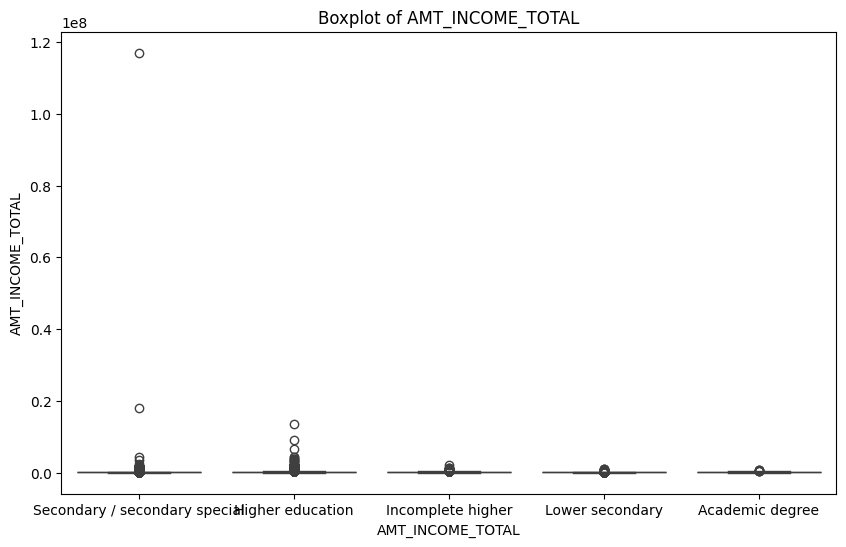

In [ ]:
#f, ax = plt.subplots(1,1, figsize=(20,8))
#sns.boxplot(x = "NAME_EDUCATION_TYPE", y = "AMT_INCOME_TOTAL", hue = "CODE_GENDER", data = data);

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['NAME_EDUCATION_TYPE'], y=data['AMT_INCOME_TOTAL'])
plt.title('Boxplot of AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.show()

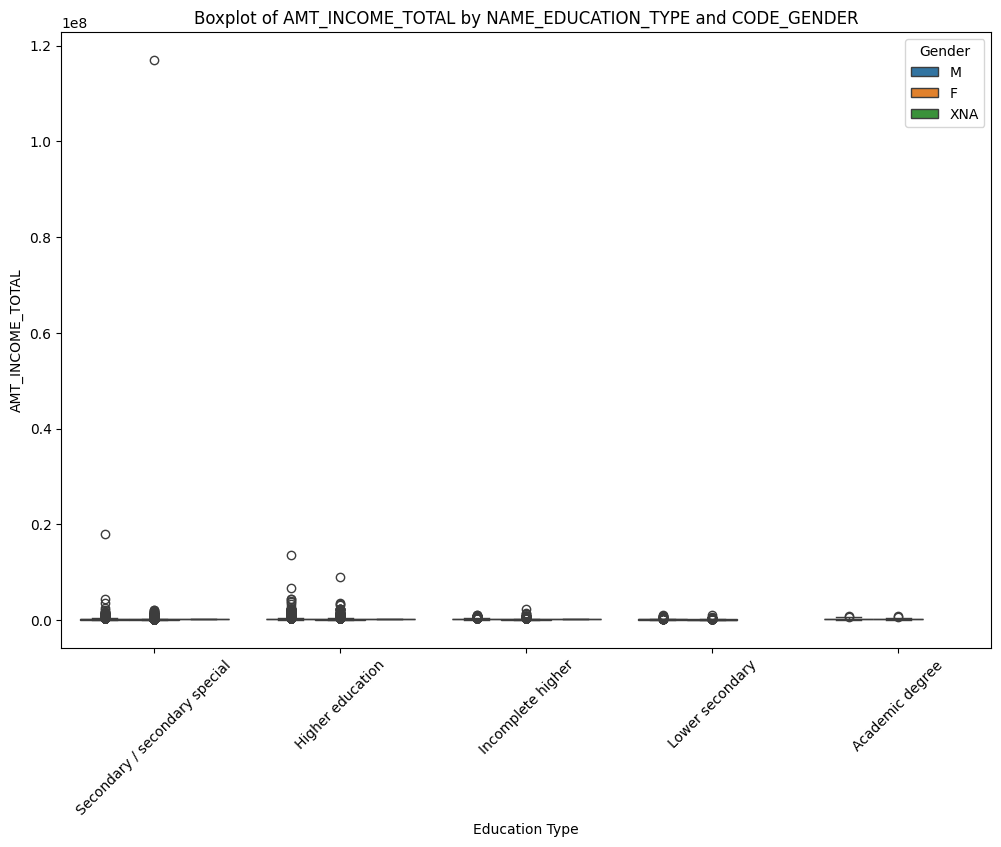

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='CODE_GENDER', data=data)
plt.title('Boxplot of AMT_INCOME_TOTAL by NAME_EDUCATION_TYPE and CODE_GENDER')
plt.xlabel('Education Type')
plt.ylabel('AMT_INCOME_TOTAL')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

En el Boxplot anterior encontramos la presencia de un Outlier Extremo, procederemos con la identificacion de esos outliers y con el filtro para apreciar mejor el boxplot sin los outliers.

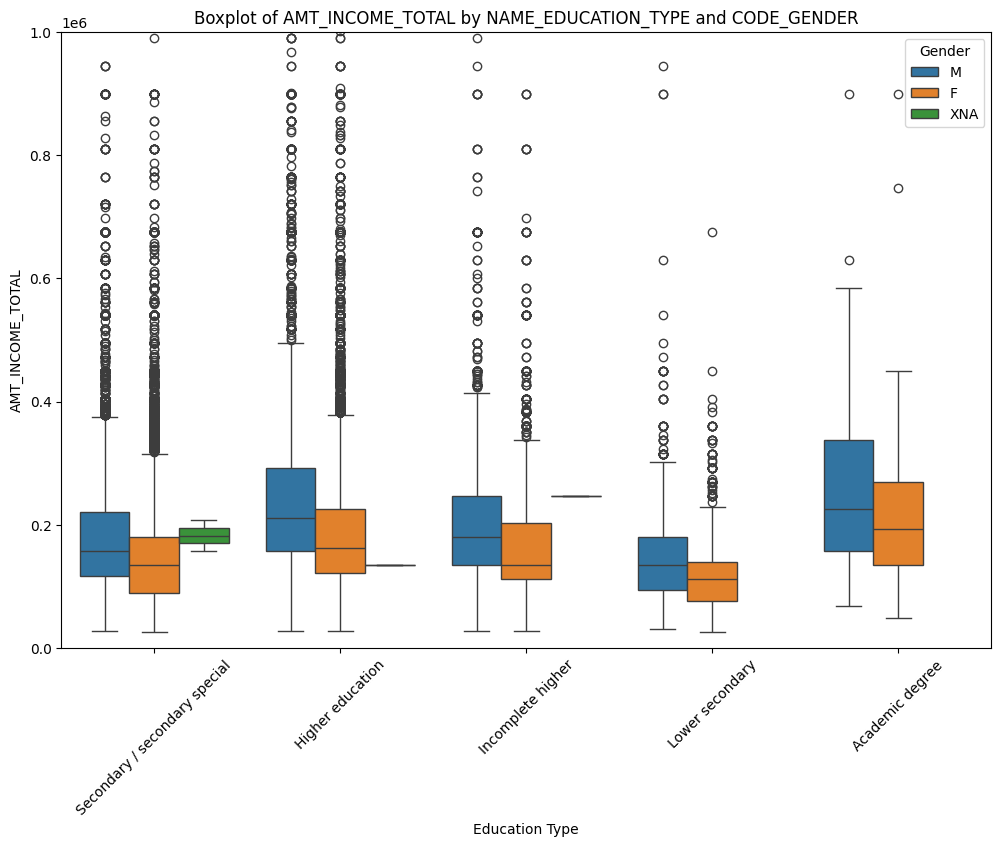

In [ ]:
# Visualizamos la informacion sin el outlier
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='CODE_GENDER', data=data)
plt.title('Boxplot of AMT_INCOME_TOTAL by NAME_EDUCATION_TYPE and CODE_GENDER')
plt.xlabel('Education Type')
plt.ylabel('AMT_INCOME_TOTAL')
plt.xticks(rotation=45)
plt.legend(title='Gender')
    # Set y-axis limit to the 99th percentile to exclude extreme outliers
#y_limit = np.percentile(data['AMT_INCOME_TOTAL'], 99)
ax.set_ylim(0, 1000000)
plt.show()

In [ ]:
# Identificaion de  outliers
outliersamt = data[data['AMT_INCOME_TOTAL'] > y_limit]
print("\nOutliers in AMT_INCOME_TOTAL:")
display(outliersamt)


Outliers in AMT_INCOME_TOTAL:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
51,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,...,Higher education,Married,House / apartment,1,1,0,1,1,0,3.0
59,100070,0,Cash loans,M,Y,Y,0,540000.0,1227901.5,46899.0,...,Higher education,Widow,House / apartment,1,1,1,1,0,0,1.0
319,100366,0,Revolving loans,M,Y,Y,0,765000.0,1350000.0,67500.0,...,Higher education,Single / not married,House / apartment,1,1,0,1,0,0,1.0
332,100380,0,Cash loans,F,N,Y,0,630000.0,900000.0,57519.0,...,Higher education,Married,House / apartment,1,1,0,1,0,0,2.0
391,100454,0,Revolving loans,M,Y,Y,3,607500.0,1350000.0,67500.0,...,Higher education,Married,House / apartment,1,1,0,1,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272473,453845,0,Cash loans,F,N,Y,0,495000.0,1024740.0,52452.0,...,Higher education,Single / not married,House / apartment,1,1,1,1,0,1,1.0
272522,453900,0,Cash loans,M,N,N,1,545733.0,1288350.0,37053.0,...,Higher education,Married,House / apartment,1,1,0,1,0,0,3.0
272641,454039,0,Cash loans,M,Y,Y,0,1215000.0,1264738.5,67513.5,...,Higher education,Civil marriage,House / apartment,1,1,0,1,0,0,2.0
272764,455107,1,Cash loans,M,Y,Y,0,495000.0,675000.0,49248.0,...,Secondary / secondary special,Married,House / apartment,1,1,0,1,1,0,2.0


In [ ]:
# Identifying and displaying outliers above the custom threshold
custom_threshold = 1000000
outliers = data[data['AMT_INCOME_TOTAL'] > custom_threshold]
print("\nOutliers in AMT_INCOME_TOTAL above the custom threshold:")
display(outliers)


Outliers in AMT_INCOME_TOTAL above the custom threshold:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
1504,101769,0,Revolving loans,M,Y,Y,0,1080000.0,180000.0,9000.0,...,Higher education,Married,House / apartment,1,1,0,1,0,0,2.0
1723,102015,0,Cash loans,F,N,Y,0,1935000.0,269550.0,10534.5,...,Secondary / secondary special,Married,House / apartment,1,0,0,1,1,0,2.0
3371,103938,0,Cash loans,F,N,N,1,1350000.0,2410380.0,109053.0,...,Higher education,Married,House / apartment,1,1,0,1,1,0,3.0
4603,105384,0,Revolving loans,F,Y,Y,0,1350000.0,405000.0,20250.0,...,Higher education,Married,House / apartment,1,1,0,1,0,0,2.0
7061,108224,0,Cash loans,F,Y,N,0,1035000.0,2695500.0,74254.5,...,Higher education,Separated,House / apartment,1,1,1,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264819,444955,0,Cash loans,M,N,Y,0,1035000.0,1575000.0,54877.5,...,Higher education,Widow,House / apartment,1,1,0,1,0,0,1.0
265146,445335,0,Cash loans,M,Y,Y,0,2475000.0,1125000.0,47794.5,...,Secondary / secondary special,Married,House / apartment,1,1,0,1,1,0,2.0
267532,448102,0,Cash loans,F,N,Y,0,1575000.0,1223010.0,51948.0,...,Secondary / secondary special,Married,House / apartment,1,1,1,1,1,0,2.0
271541,452764,0,Cash loans,F,Y,Y,1,2025000.0,935640.0,93487.5,...,Higher education,Married,House / apartment,1,1,0,1,0,0,3.0


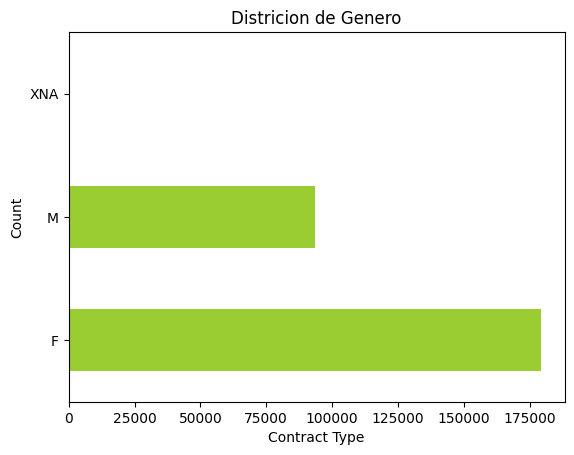

In [ ]:
import matplotlib.pyplot as plt

# Conteo
gender_count = data['CODE_GENDER'].value_counts()

# Plot de los resultados
gender_count.plot(kind='barh', color='yellowgreen')

# Agregamos los titulos
plt.title('Distribucion de Genero')
plt.xlabel('Contract Type')
plt.ylabel('Count')

# Mostramos el plot
plt.show()

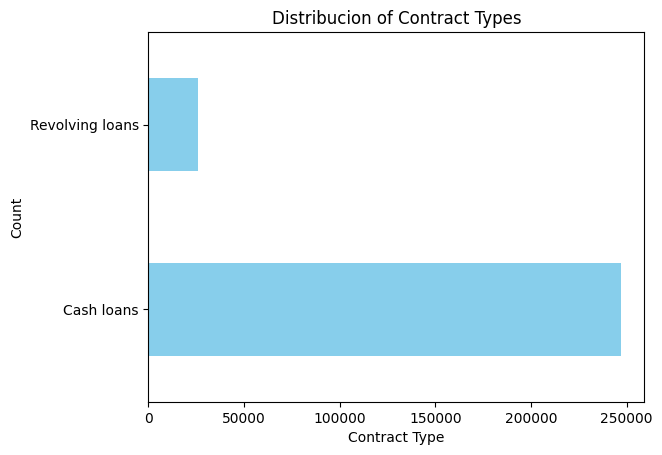

In [ ]:
import matplotlib.pyplot as plt

# Conteo
contract_type_counts = data['NAME_CONTRACT_TYPE'].value_counts()

# Plot de los resultados
contract_type_counts.plot(kind='barh', color='skyblue')

# Agregamos los titulos
plt.title('Distribucion of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')

# Mostramos el plot
plt.show()

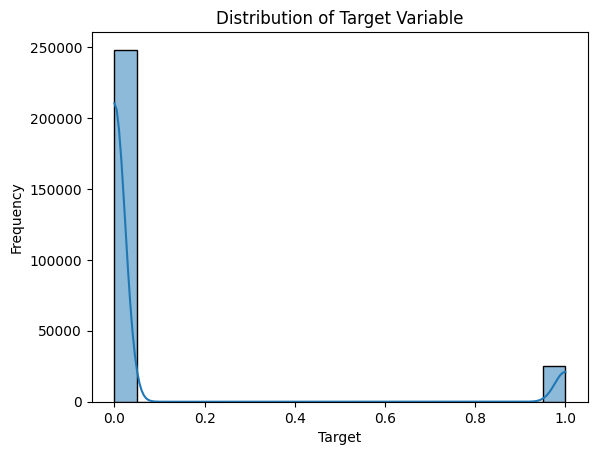

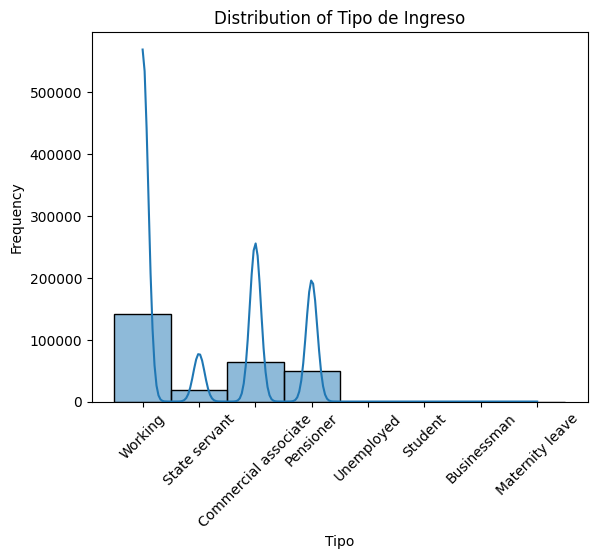

In [ ]:
# Visualizacion


import seaborn as sns


# Crear un histograma para la variable objetivo
sns.histplot(data['TARGET'], kde=True)
plt.title('Distribucion de Target ')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

# Crear un hist para ver el tipo de ingreso
sns.histplot(data['NAME_INCOME_TYPE'], kde=True)
plt.title('Distribucion del Tipo de Ocupacion')
plt.xlabel('Tipo')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



Text(0.5, 1.0, 'Total Credit Amount by Occupation Type and Contract Type')

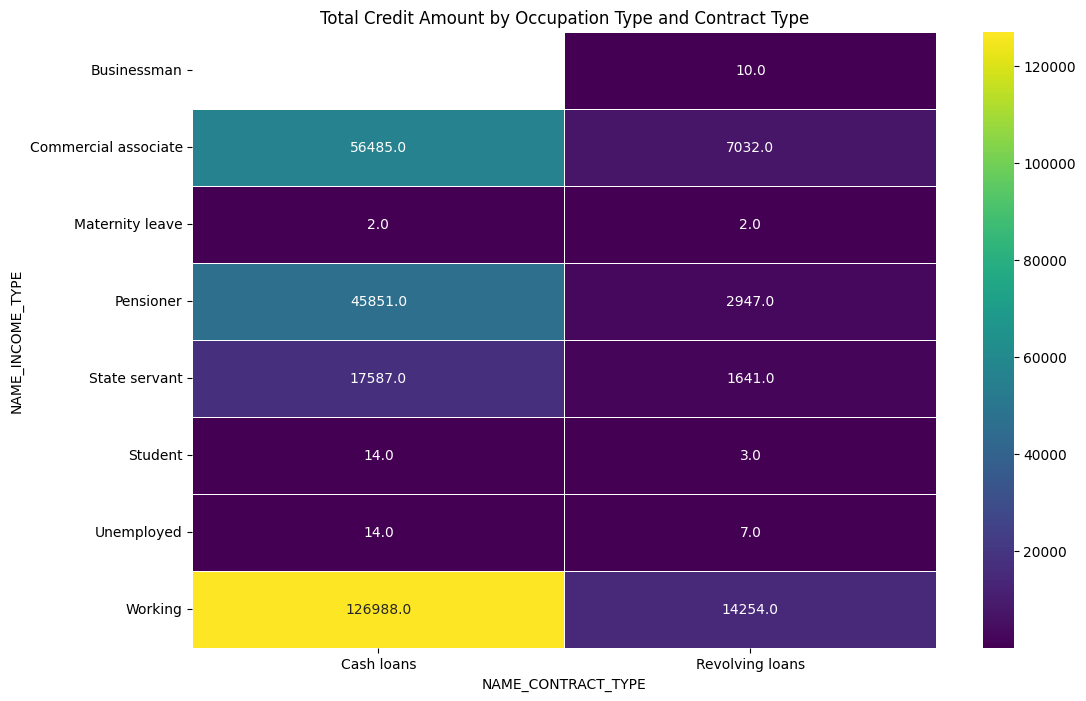

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un heatmap sobre el tipo de contrato por cada tipo de ingreso
pivot_table = data.pivot_table(index='NAME_INCOME_TYPE', columns='NAME_CONTRACT_TYPE', values='AMT_CREDIT', aggfunc='count')


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.1f', linewidths=.5)
plt.title('Total Credit Amount by Occupation Type and Contract Type')

In [ ]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS'],
      dtype='object')

##Estadística Descriptiva

In [ ]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,272837.000000,272837.000000,272837.000000,2.728370e+05,2.728370e+05,272837.000000,2.728370e+05,272837.000000,272837.000000,272837.000000,272837.000000,272837.000000,272837.000000,272837.000000
mean,283023.659669,0.090988,0.417015,1.687680e+05,5.985654e+05,27099.346542,5.377116e+05,0.999996,0.821051,0.199592,0.998164,0.280449,0.056686,2.152542
std,106643.979566,0.287593,0.722582,2.490826e+05,4.017124e+05,14441.680470,3.684534e+05,0.001914,0.383311,0.399694,0.042812,0.449220,0.231242,0.910815
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,179096.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16542.000000,2.385000e+05,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,296289.000000,0.000000,0.000000,1.485000e+05,5.135310e+05,24930.000000,4.500000e+05,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000
75%,375166.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000
max,456254.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000


In [ ]:
data.shape

(272837, 23)

In [ ]:
#1. Variable SK_ID_CURR
data['SK_ID_CURR'].describe()

count    272837.000000
mean     283023.659669
std      106643.979566
min      100002.000000
25%      179096.000000
50%      296289.000000
75%      375166.000000
max      456254.000000
Name: SK_ID_CURR, dtype: float64

In [ ]:
#2.TARGET
data['TARGET'].describe()

count    272837.000000
mean          0.090988
std           0.287593
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

In [ ]:
#3.NAME_CONTRACT_TYPE
data['NAME_CONTRACT_TYPE'].describe()

count         272837
unique             2
top       Cash loans
freq          246941
Name: NAME_CONTRACT_TYPE, dtype: object

In [ ]:
#4.CODE_GENDER
data['CODE_GENDER'].describe()

count     272837
unique         3
top            F
freq      179324
Name: CODE_GENDER, dtype: object

In [ ]:
#4 Eliminar gender XNA gender solo deberiamos tener dos tipos  F M
data = data[data['CODE_GENDER'].isin(['F', 'M'])]

In [ ]:
#4.CODE_GENDER
data['CODE_GENDER'].describe()

count     272833
unique         2
top            F
freq      179324
Name: CODE_GENDER, dtype: object

In [ ]:
#5.FLAG_OWN_CAR
data['FLAG_OWN_CAR'].describe()

count     272833
unique         2
top            N
freq      179985
Name: FLAG_OWN_CAR, dtype: object

In [ ]:
#6.FLAG_OWN_REALTY
data['FLAG_OWN_REALTY'].describe()

count     272833
unique         2
top            Y
freq      189235
Name: FLAG_OWN_REALTY, dtype: object

In [ ]:
#7.CNT_CHILDREN
data['CNT_CHILDREN'].describe()

count    272833.000000
mean          0.417010
std           0.722579
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [ ]:
#Eliminamos datos con hijos mayores a 7
data.drop(data[data['CNT_CHILDREN'] > 7].index, inplace = True)

In [ ]:
#7.CNT_CHILDREN
data['CNT_CHILDREN'].describe()

count    272819.000000
mean          0.416412
std           0.717327
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           7.000000
Name: CNT_CHILDREN, dtype: float64

In [ ]:
#8.AMT_INCOME_TOTAL
data['AMT_INCOME_TOTAL'].describe()

count    2.728190e+05
mean     1.687682e+05
std      2.490898e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
#9.AMT_CREDIT
data['AMT_INCOME_TOTAL'].describe()

count    2.728190e+05
mean     1.687682e+05
std      2.490898e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
#10.AMT_ANNUITY
data['AMT_ANNUITY'].describe()

count    272819.000000
mean      27099.521159
std       14441.672815
min        1615.500000
25%       16542.000000
50%       24930.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [ ]:
#11.AMT_GOODS_PRICE
data['AMT_GOODS_PRICE'].describe()

count    2.728190e+05
mean     5.377175e+05
std      3.684574e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
#12.NAME_TYPE_SUITE
data['NAME_TYPE_SUITE'].describe()

count            272819
unique                7
top       Unaccompanied
freq             221648
Name: NAME_TYPE_SUITE, dtype: object

In [ ]:
#13.NAME_INCOME_TYPE
data['NAME_INCOME_TYPE'].describe()

count      272819
unique          8
top       Working
freq       141231
Name: NAME_INCOME_TYPE, dtype: object

In [ ]:
#14.NAME_EDUCATION_TYPE
data['NAME_EDUCATION_TYPE'].describe()

count                            272819
unique                                5
top       Secondary / secondary special
freq                             193929
Name: NAME_EDUCATION_TYPE, dtype: object

In [ ]:
#15.NAME_FAMILY_STATUS
data['NAME_FAMILY_STATUS'].describe()

count      272819
unique          6
top       Married
freq       174116
Name: NAME_FAMILY_STATUS, dtype: object

In [ ]:
#15 Eliminanos unkonwn
data = data[data['NAME_FAMILY_STATUS'] != 'Unknown']

In [ ]:
#15.NAME_FAMILY_STATUS
data['NAME_FAMILY_STATUS'].describe()

count      272817
unique          5
top       Married
freq       174116
Name: NAME_FAMILY_STATUS, dtype: object

In [ ]:
data['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated'], dtype=object)

In [ ]:
#16.NAME_HOUSING_TYPE
data['NAME_HOUSING_TYPE'].describe()

count                272817
unique                    6
top       House / apartment
freq                 241930
Name: NAME_HOUSING_TYPE, dtype: object

In [ ]:
#17.FLAG_MOBIL
data['FLAG_MOBIL'].describe()

count    272817.000000
mean          0.999996
std           0.001915
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_MOBIL, dtype: float64

In [ ]:
#18.FLAG_EMP_PHONE
data['FLAG_EMP_PHONE'].describe()

count    272817.000000
mean          0.821041
std           0.383319
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_EMP_PHONE, dtype: float64

In [ ]:
#19.FLAG_WORK_PHONE
data['FLAG_WORK_PHONE'].describe()

count    272817.000000
mean          0.199562
std           0.399672
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_WORK_PHONE, dtype: float64

In [ ]:
#20.FLAG_CONT_MOBILE
data['FLAG_CONT_MOBILE'].describe()

count    272817.000000
mean          0.998164
std           0.042814
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_CONT_MOBILE, dtype: float64

In [ ]:
#21.FLAG_PHONE
data['FLAG_PHONE'].describe()

count    272817.000000
mean          0.280437
std           0.449214
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: FLAG_PHONE, dtype: float64

In [ ]:
#22.FLAG_EMAIL
data['FLAG_EMAIL'].describe()

count    272817.00000
mean          0.05669
std           0.23125
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: FLAG_EMAIL, dtype: float64

In [ ]:
#23.CNT_FAM_MEMBER
data['CNT_FAM_MEMBERS'].describe()

count    272817.000000
mean          2.151937
std           0.906724
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           9.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [ ]:
# Cambiando la variable children a tipo entero:
data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272817 entries, 0 to 272836
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           272817 non-null  int64  
 1   TARGET               272817 non-null  int64  
 2   NAME_CONTRACT_TYPE   272817 non-null  object 
 3   CODE_GENDER          272817 non-null  object 
 4   FLAG_OWN_CAR         272817 non-null  object 
 5   FLAG_OWN_REALTY      272817 non-null  object 
 6   CNT_CHILDREN         272817 non-null  int64  
 7   AMT_INCOME_TOTAL     272817 non-null  float64
 8   AMT_CREDIT           272817 non-null  float64
 9   AMT_ANNUITY          272817 non-null  float64
 10  AMT_GOODS_PRICE      272817 non-null  float64
 11  NAME_TYPE_SUITE      272817 non-null  object 
 12  NAME_INCOME_TYPE     272817 non-null  object 
 13  NAME_EDUCATION_TYPE  272817 non-null  object 
 14  NAME_FAMILY_STATUS   272817 non-null  object 
 15  NAME_HOUSING_TYPE    2

#Paso 3 :Dividir Características en Numéricas y Categoricas

In [ ]:
#Eliminamos las columnas con alta colinealidad
data.drop(columns=['AMT_GOODS_PRICE', 'AMT_CREDIT'], inplace=True)

In [ ]:
#Creamos varible para datos numericos
data_numerica = data.select_dtypes(include=["int", "float"])
numerica = list(data_numerica.columns)
numerica

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_ANNUITY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

In [ ]:
# Creamos varible para datos categoricos
data_categorica = data.select_dtypes(include=["object"])
categorica = list(data_categorica.columns)
categorica

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

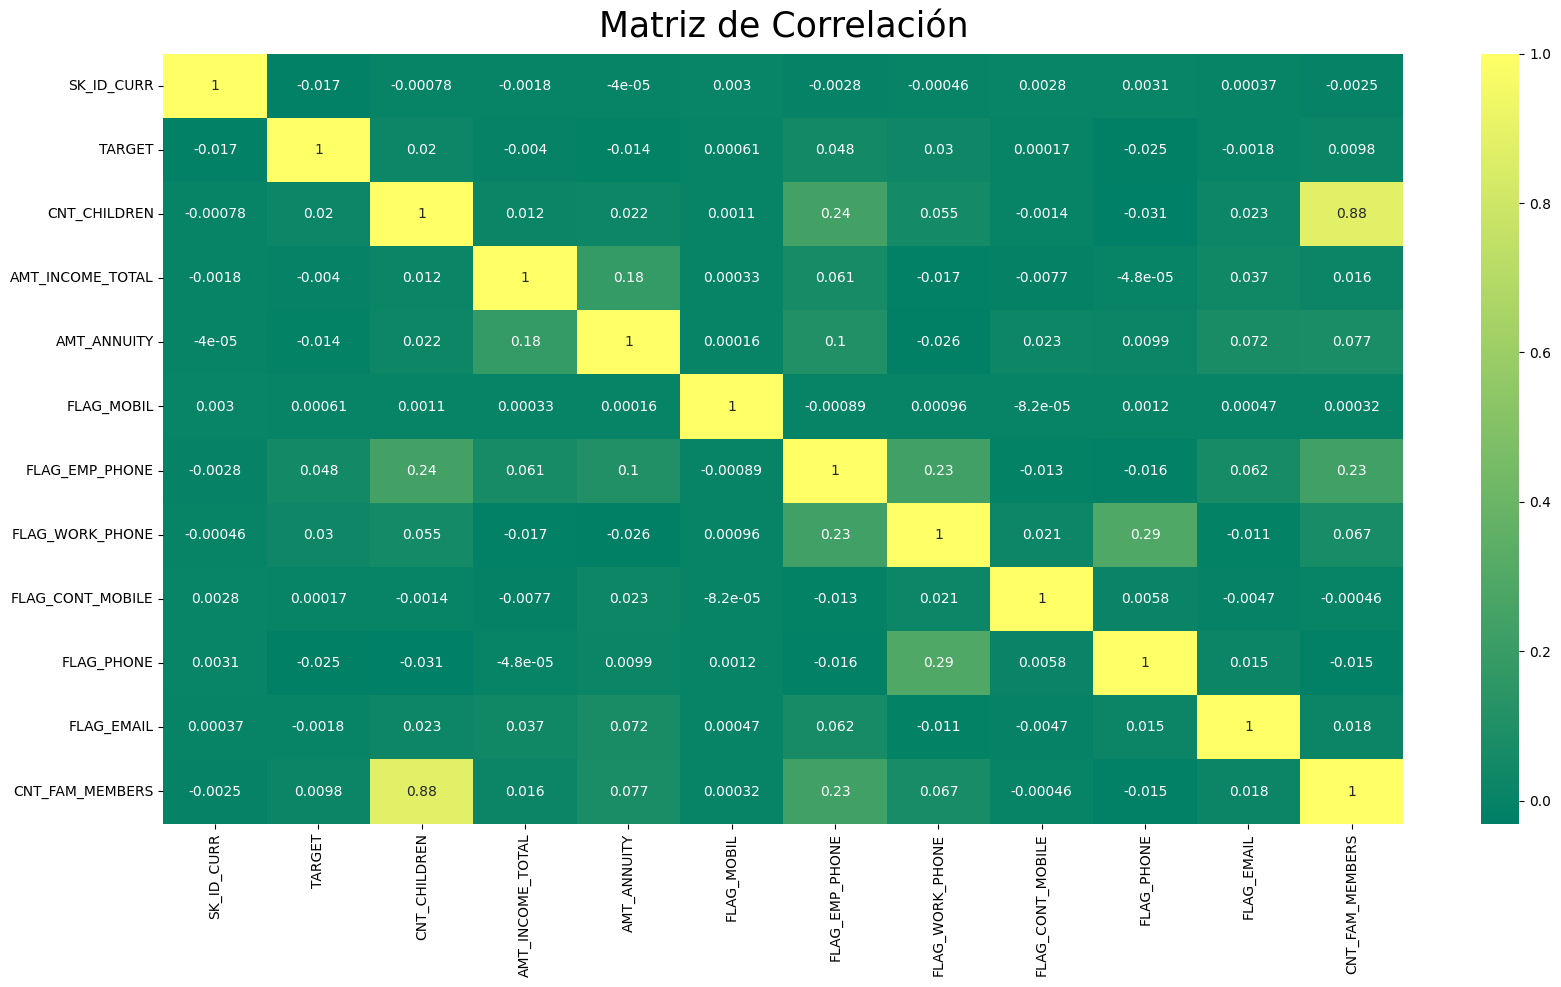

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(data[numerica].corr(),cmap='summer',annot=True)

heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12);


Interpretación Focalizada en TARGET:

Correlaciones con TARGET:

TARGET tiene una correlación muy baja con todas las otras variables.
Las correlaciones positivas más altas con TARGET son con FLAG_EMP_PHONE (0.048) y FLAG_WORK_PHONE (0.03).
Las correlaciones negativas más altas con TARGET son con FLAG_PHONE (-0.025) y AMT_ANNUITY (-0.014).

Redundancia de Variables:

CNT_CHILDREN y CNT_FAM_MEMBERS tienen una correlación muy alta (0.88). procederemos a  eliminar una de estas variables para reducir la redundancia en el modelo.


In [ ]:
# Eliminar la columna CNT_CHILDREN para reducir redundancia
data = data.drop(columns=['CNT_CHILDREN'])

In [ ]:
data_numerica = data.select_dtypes(include=["int", "float"])
numerica = list(data_numerica.columns)
numerica

['SK_ID_CURR',
 'TARGET',
 'AMT_INCOME_TOTAL',
 'AMT_ANNUITY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

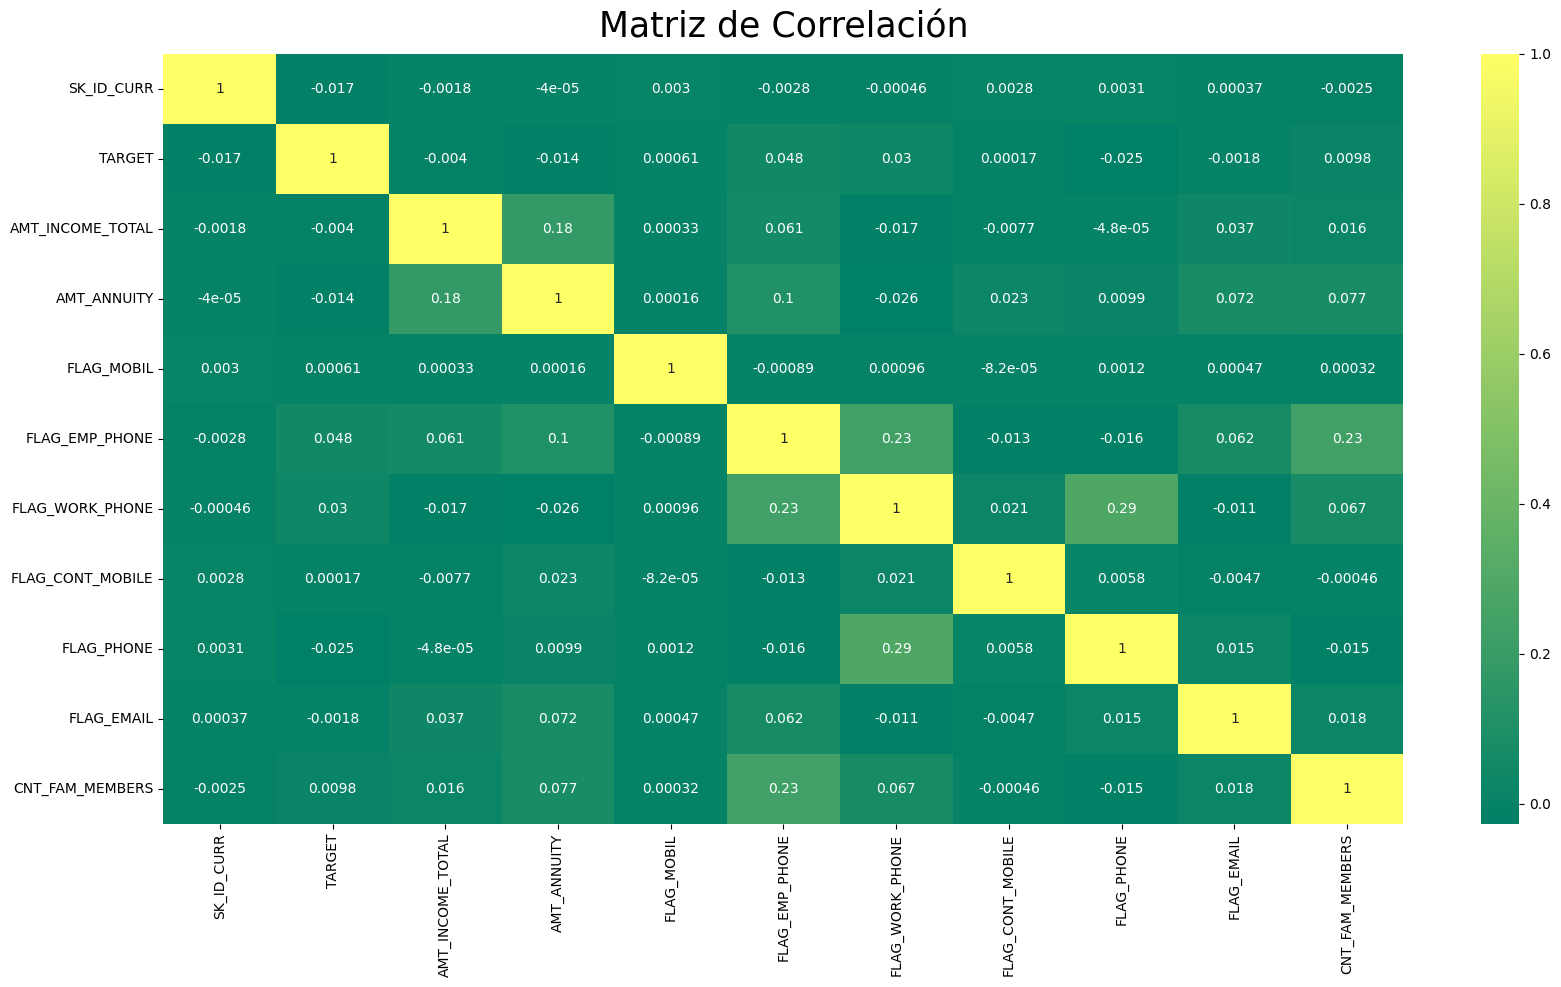

In [ ]:
# Calcular la nueva matriz de correlación
# Matriz de correlación
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(data[numerica].corr(),cmap='summer',annot=True)

heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12);

In [ ]:
data.to_csv('aagrupo3data.csv')

# Código para descargar el archivo en Colab
from google.colab import files
files.download('aagrupo3data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Paso 4: Identificacion de Outliers

In [ ]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.0-py3-none-any.whl size=196324 sha256=abe5601c499a02a8404c97b846aea3d5a922cabf037ff1e65ca3414057f9ff9f
  Stored in directory: /root/.cache/pip/wheels/15/0e/91/96b270e6741d4eece88727489411330226ff47ac1cb9ea0097
Successfully built pyod


In [ ]:
# Verificar y eliminar columnas innecesarias
columns_to_drop = ['Unnamed: 0', 'SK_ID_CURR']
for column in columns_to_drop:
    if column in data.columns:
        data = data.drop(columns=[column])

In [ ]:
# Separar las características y el objetivo

# Convertir variables categóricas a numéricas usando One-Hot Encoding
data_encoded = pd.get_dummies(data, drop_first=True)



In [ ]:
# Separar las características y el objetivo
X = data_encoded.drop(columns=['TARGET'])
y = data_encoded['TARGET']

In [ ]:
# Definir y entrenar el modelo KNN
from pyod.models.knn import KNN
knn = KNN(contamination=0.03, method='mean', n_neighbors=5)
knn.fit(X)

KNN(algorithm='auto', contamination=0.03, leaf_size=30, method='mean',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
predicted = pd.Series(knn.predict(X), index=X.index)

print('Number of outliers = ', predicted.sum())

Number of outliers =  5783


In [ ]:
predicted = pd.Series(knn.predict(X), index=X.index)

print('Number of outliers = ', predicted.sum())

Number of outliers =  5783


In [ ]:
predicted = pd.Series(knn.predict(X), index=X.index)

print('Number of outliers = ', predicted.sum())

Number of outliers =  5783


In [ ]:
#6. filtramos los outliers
# Filtrar los outliers
outliers = predicted[predicted == 1]
non_outliers = predicted[predicted == 0]

In [ ]:
outliers

151       1
167       1
236       1
270       1
298       1
         ..
272641    1
272681    1
272710    1
272720    1
272823    1
Length: 5783, dtype: int64

In [ ]:
# Filtrar los outliers
non_outliers = predicted[predicted == 0]

# Crear un DataFrame con los datos que no son outliers
non_outliers_df = data.loc[non_outliers.index]

In [ ]:
# Mostrar el número de filas sin outliers y las primeras filas del DataFrame
print("Número de filas sin outliers: ", non_outliers_df.shape[0])
non_outliers_df.head()

Número de filas sin outliers:  267034


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,1,Cash loans,M,N,Y,202500.0,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,1,0,1
1,0,Cash loans,F,N,N,270000.0,35698.5,Family,State servant,Higher education,Married,House / apartment,1,1,0,1,1,0,2
2,0,Revolving loans,M,Y,Y,67500.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,1,1,1,0,1
3,0,Cash loans,F,N,Y,135000.0,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,1,0,0,2
4,0,Cash loans,M,N,Y,121500.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,0,0,1


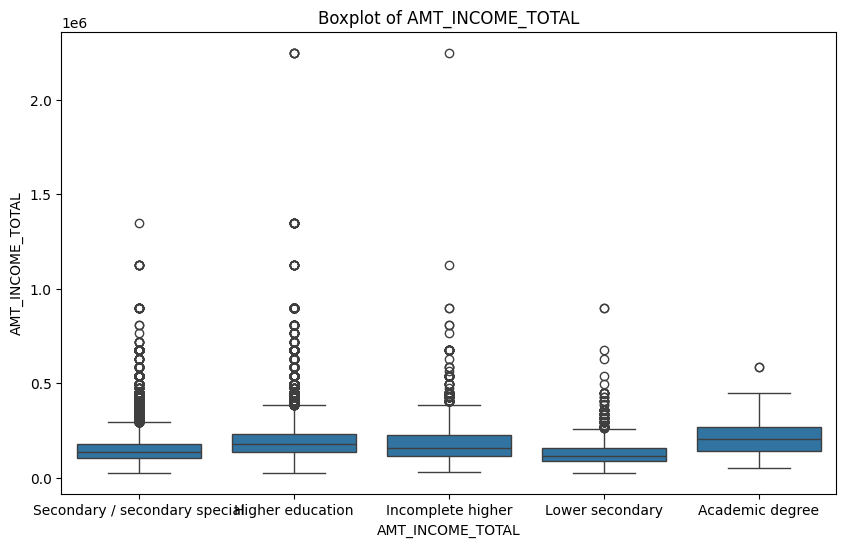

In [ ]:
#f, ax = plt.subplots(1,1, figsize=(20,8))
#sns.boxplot(x = "NAME_EDUCATION_TYPE", y = "AMT_INCOME_TOTAL", hue = "CODE_GENDER", data = data);

plt.figure(figsize=(10, 6))
sns.boxplot(x=non_outliers_df['NAME_EDUCATION_TYPE'], y=non_outliers_df['AMT_INCOME_TOTAL'])
plt.title('Boxplot of AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.show()

In [ ]:
non_outliers_df.to_csv('aagrupo3nout.csv')

# Código para descargar el archivo en Colab
from google.colab import files
files.download('aagrupo3nout.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Paso 5: Identificacion y Entrenar el Modelo.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aagrupo3nout.csv to aagrupo3nout.csv


In [ ]:
import io
import pandas as pd
tarjetanew = pd.read_csv(io.BytesIO(uploaded['aagrupo3nout.csv']))

In [ ]:
tarjetanew.columns

Index(['Unnamed: 0', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 

In [ ]:
from pycaret.classification import *
tarjeta = setup(tarjetanew, target = 'TARGET')

,Description,Value
0,Session id,391
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(267034, 20)"
4,Transformed data shape,"(267034, 46)"
5,Transformed train set shape,"(186923, 46)"
6,Transformed test set shape,"(80111, 46)"
7,Numeric features,10
8,Categorical features,9
9,Preprocess,True


In [ ]:
MejorModelo = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9197,0.6790,0.1239,0.9991,0.2203,0.2043,0.3370,40.4150
ada,Ada Boost Classifier,0.9196,0.6736,0.1230,0.9996,0.2190,0.2030,0.3359,10.9690
xgboost,Extreme Gradient Boosting,0.9183,0.6674,0.1184,0.9195,0.2097,0.1929,0.3134,5.0670
lightgbm,Light Gradient Boosting Machine,0.9170,0.6759,0.1050,0.9072,0.1881,0.1724,0.2925,8.1430
rf,Random Forest Classifier,0.9121,0.6238,0.0624,0.7422,0.1150,0.1023,0.1986,41.5610
knn,K Neighbors Classifier,0.9109,0.5623,0.1015,0.5774,0.1726,0.1494,0.2154,50.9380
lr,Logistic Regression,0.9084,0.6285,0.0000,0.0000,0.0000,0.0000,0.0000,12.1430
nb,Naive Bayes,0.9084,0.5621,0.0000,0.0000,0.0000,0.0000,0.0000,2.2590
ridge,Ridge Classifier,0.9084,0.6290,0.0000,0.0000,0.0000,-0.0000,-0.0006,2.1110
lda,Linear Discriminant Analysis,0.9084,0.6290,0.0002,0.3000,0.0005,0.0003,0.0066,3.4630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
evaluate_model(MejorModelo)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prueba de Modelos

## Analisis de test en modelos ADA, XGBOOST y GBC

**Resumen y Recomendaciones**

Mejor Modelo: Gradient Boosting Classifier (gbc)

Precisión: El gbc tiene la precisión más alta (0.9198) entre los modelos evaluados.

AUC: El gbc también muestra el AUC más alto (0.6779), indicando una mejor capacidad para distinguir entre clases.

Recall y Precisión: El gbc mantiene un buen balance entre recall (0.1246) y precisión (0.9991), resultando en un F1 Score decente (0.2215).

MCC: El coeficiente de correlación de Matthews (0.3381) es el más alto, lo que indica una mejor calidad de predicción global.

**Reconmendaciones**

Uso del gbc: Basado en las métricas de rendimiento, se recomienda usar el Gradient Boosting Classifier para este problema de clasificación debido a su mejor balance de precisión, recall y otras métricas de evaluación.

##ADA

In [ ]:
# Afinar el segundo mejor modelo encontrado:
model2 = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9202,0.6571,0.1296,1.0000,0.2295,0.2129,0.3452
1,0.9194,0.6687,0.1208,1.0000,0.2156,0.1998,0.3332
2,0.9187,0.6828,0.1127,1.0000,0.2025,0.1874,0.3216
3,0.9199,0.6740,0.1250,1.0000,0.2222,0.2061,0.3389
4,0.9201,0.6731,0.1273,1.0000,0.2259,0.2096,0.3421
5,0.9202,0.6731,0.1297,0.9955,0.2295,0.2128,0.3443
6,0.9203,0.6790,0.1303,1.0000,0.2305,0.2139,0.3461
7,0.9198,0.6795,0.1244,1.0000,0.2213,0.2052,0.3381
8,0.9189,0.6745,0.1150,1.0000,0.2063,0.1910,0.3249


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

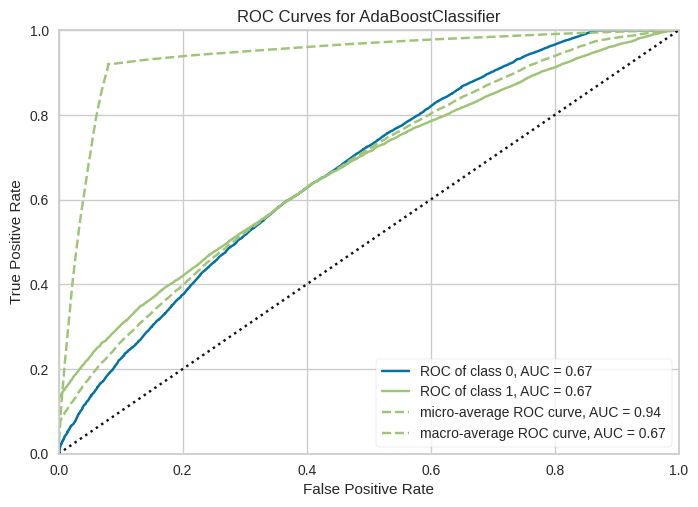

In [ ]:
# Plot the AUC-ROC curve
plot_model(model2, plot='auc')


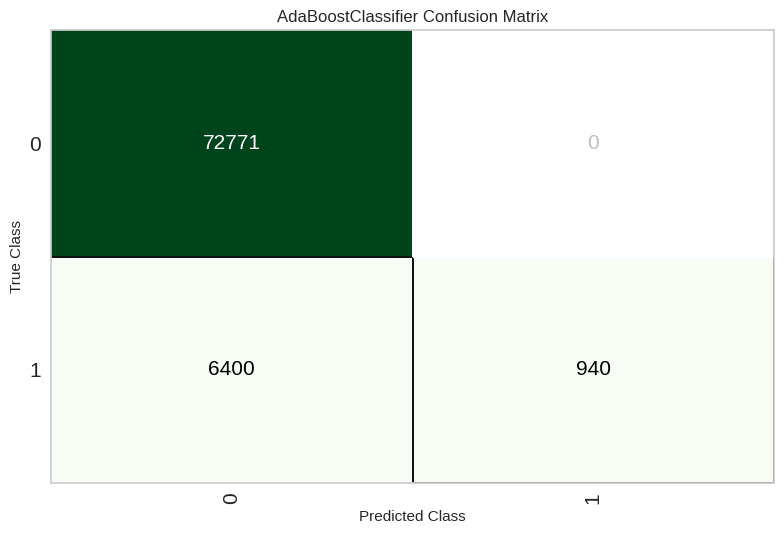

In [ ]:
# Plot the Confusion Matrix
plot_model(model2, plot='confusion_matrix')

##xgboost

In [ ]:
# Afinar el tercer mejor modelo encontrado:
model3 = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9188,0.6505,0.1278,0.9012,0.2239,0.2058,0.3220
1,0.9177,0.6597,0.1138,0.9028,0.2022,0.1855,0.3040
2,0.9172,0.6743,0.1062,0.9146,0.1904,0.1746,0.2959
3,0.9184,0.6666,0.1227,0.8974,0.2158,0.1982,0.3146
4,0.9187,0.6653,0.1215,0.9286,0.2149,0.1979,0.3196
5,0.9186,0.6680,0.1250,0.8992,0.2195,0.2016,0.3179
6,0.9187,0.6725,0.1227,0.9251,0.2166,0.1994,0.3204
7,0.9193,0.6741,0.1238,0.9593,0.2193,0.2026,0.3290
8,0.9177,0.6707,0.1103,0.9265,0.1972,0.1812,0.3039


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

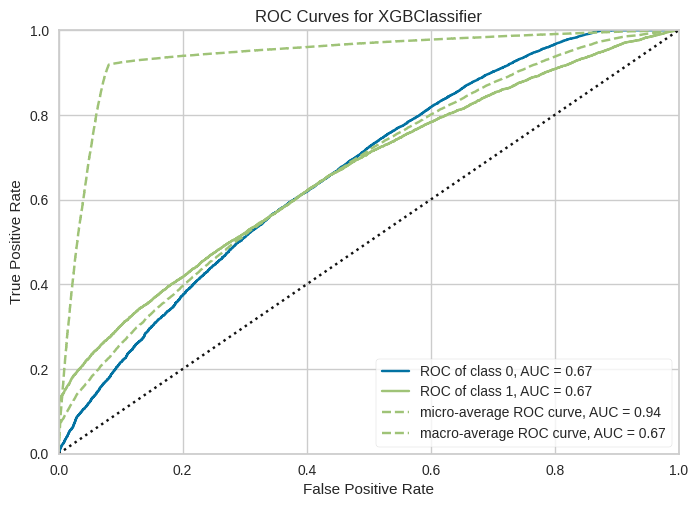

In [ ]:
# Plot the AUC-ROC curve
plot_model(model3, plot='auc')

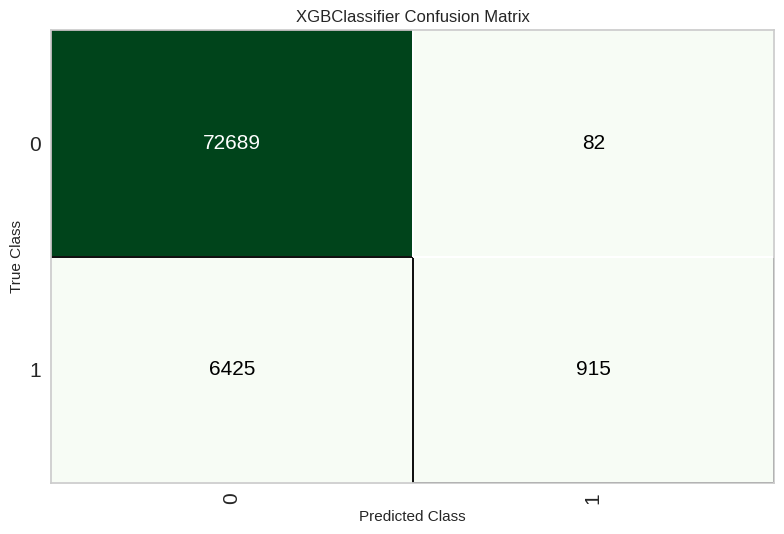

In [ ]:
# Plot the Confusion Matrix
plot_model(model3, plot='confusion_matrix')

##GBC

In [ ]:
# Afinar el mejor modelo encontrado: Gradient Boosting Classifier
best_model = create_model('gbc')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:14:29
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9198,0.6761,0.1243,1.0000,0.2212,0.2051,0.3380
1,0.9193,0.6821,0.1191,1.0000,0.2128,0.1972,0.3307
2,0.9200,0.6686,0.1273,1.0000,0.2258,0.2094,0.3420
3,0.9194,0.6771,0.1203,1.0000,0.2148,0.1990,0.3325
4,0.9192,0.6737,0.1174,1.0000,0.2101,0.1946,0.3283
5,0.9201,0.6774,0.1285,0.9955,0.2276,0.2111,0.3428
6,0.9202,0.6797,0.1291,1.0000,0.2287,0.2122,0.3445
7,0.9204,0.6836,0.1314,1.0000,0.2323,0.2156,0.3476
8,0.9200,0.6758,0.1273,1.0000,0.2258,0.2094,0.3420


In [ ]:
# Obtener el desempeño del modelo afinado
results = pull()
print(results)

                                    Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.9198  0.6779  0.1246  0.9991   
ada                  Ada Boost Classifier    0.9197  0.6706  0.1237  0.9995   
xgboost         Extreme Gradient Boosting    0.9173  0.6655  0.1121  0.8800   
lightgbm  Light Gradient Boosting Machine    0.9167  0.6756  0.1018  0.9013   
rf               Random Forest Classifier    0.9124  0.6188  0.0646  0.7619   
knn                K Neighbors Classifier    0.9112  0.5580  0.1017  0.5880   
lr                    Logistic Regression    0.9084  0.6267  0.0000  0.0000   
nb                            Naive Bayes    0.9084  0.5620  0.0000  0.0000   
ridge                    Ridge Classifier    0.9084  0.6277  0.0000  0.0000   
lda          Linear Discriminant Analysis    0.9084  0.6277  0.0004  0.4333   
dummy                    Dummy Classifier    0.9084  0.5000  0.0000  0.0000   
et                 Extra Trees Classifier    0.8997 

In [ ]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=8642, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Test del mejor modelo

In [ ]:
pred = predict_model(best_model, data=tarjetanew)
pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9199,0.6845,0.1262,0.9997,0.2241,0.2078,0.3405


,Unnamed: 0,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,TARGET,prediction_label,prediction_score
0,0,Cash loans,M,N,Y,202500.0,24700.5,Unaccompanied,Working,Secondary / secondary special,...,1,1,0,1,1,0,1,1,0,0.8496
1,1,Cash loans,F,N,N,270000.0,35698.5,Family,State servant,Higher education,...,1,1,0,1,1,0,2,0,0,0.9668
2,2,Revolving loans,M,Y,Y,67500.0,6750.0,Unaccompanied,Working,Secondary / secondary special,...,1,1,1,1,1,0,1,0,0,0.9302
3,3,Cash loans,F,N,Y,135000.0,29686.5,Unaccompanied,Working,Secondary / secondary special,...,1,1,0,1,0,0,2,0,0,0.8922
4,4,Cash loans,M,N,Y,121500.0,21865.5,Unaccompanied,Working,Secondary / secondary special,...,1,1,0,1,0,0,1,0,0,0.8213


In [ ]:
pred.to_csv('aagrupomodel.pkl')

# Código para descargar el archivo en Colab
from google.colab import files
files.download('aagrupomodel.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(pred.columns)

Index(['Unnamed: 0', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'TARGET', 'prediction_label', 'prediction_score'],
      dtype='object')


In [ ]:
# Save the predictions and true labels to a CSV file
pred[['TARGET', 'prediction_label', 'prediction_score']].to_csv('predictions.csv', index=False)

# If using Colab, download the file
from google.colab import files
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Paso 6: Visualizacion del Mejor Modelo - Gráficas de Evaluación

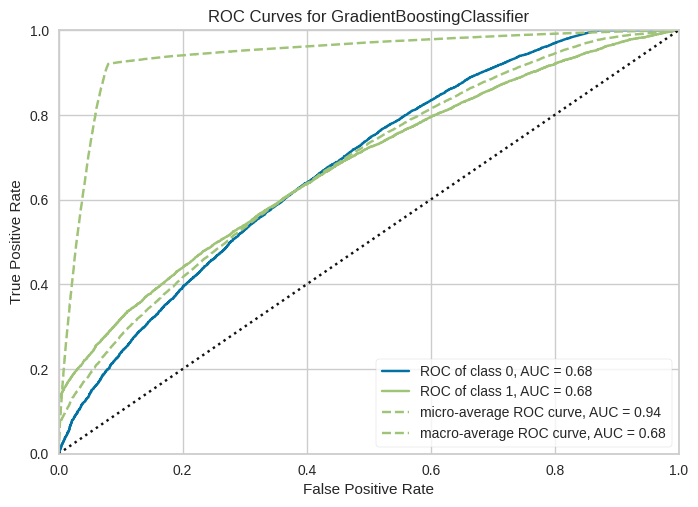

In [ ]:
# Plot the AUC-ROC curve
plot_model(best_model, plot='auc')



**AUC de la Clase 0 y Clase 1 (0.68):**

El AUC de 0.68 para ambas clases sugiere que el modelo tiene una capacidad moderada para distinguir entre las clases de fraude y no fraude. Un AUC de 0.68 indica que hay un 68% de probabilidad de que el modelo clasifique correctamente una instancia aleatoria positiva (fraude) frente a una instancia negativa (no fraude).

**Micro-average AUC (0.94):**

El AUC micro-promedio es significativamente más alto (0.94), lo que indica que, cuando se consideran todas las instancias por igual, el modelo tiene un excelente desempeño. Esto sugiere que el modelo tiene un buen equilibrio general en la clasificación, pero puede estar influenciado por la cantidad de instancias de la clase mayoritaria.

**Macro-average AUC (0.68):**
El AUC macro-promedio refleja el desempeño promedio del modelo en ambas clases, que también es 0.68. Esto refuerza la idea de que el modelo es consistentemente moderado en su capacidad de distinguir entre clases.


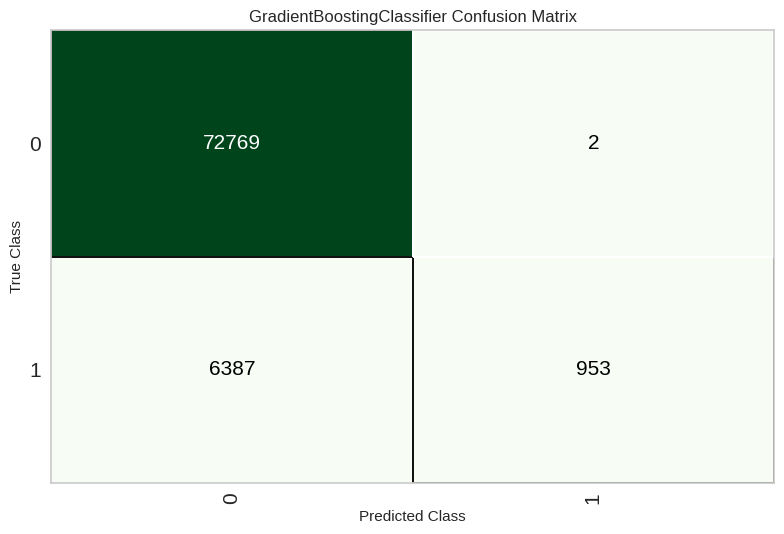

In [ ]:
# Plot the Confusion Matrix
plot_model(best_model, plot='confusion_matrix')

**Componentes de la Matriz de Confusión**

Verdaderos Negativos (TN): 72,769

El número de instancias que son realmente negativas (no fraude) y que el modelo predijo correctamente como negativas.

Falsos Positivos (FP): 2

El número de instancias que son realmente negativas (no fraude) pero que el modelo predijo incorrectamente como positivas (fraude).
Falsos Negativos (FN): 6,387

El número de instancias que son realmente positivas (fraude) pero que el modelo predijo incorrectamente como negativas (no fraude).
Verdaderos Positivos (TP): 953

El número de instancias que son realmente positivas (fraude) y que el modelo predijo correctamente como positivas.

#**7 Hallazgos**

**Hallazgos del Modelo de Clasificación**


**Rendimiento Actual del Modelo gbc:**

Precisión (Accuracy): 0.9198 ± 0.0004
AUC: 0.6779 ± 0.0046
Recall: 0.1246 ± 0.0046
Precisión (Precision): 0.9991 ± 0.0019
F1 Score: 0.2215 ± 0.0073
Kappa: 0.2053 ± 0.0069
MCC: 0.3381 ± 0.0063

**Observaciones sobre el Rendimiento:**

Alta precisión y precisión extremadamente alta, pero con un recall bajo.
Capacidad moderada para distinguir entre clases (AUC razonable).
Posible sesgo hacia la clase mayoritaria debido a la alta precisión y bajo recall.

**Variables Actuales:**

El modelo actual podría estar limitado por las variables disponibles, lo que afecta su capacidad para capturar todas las instancias positivas y distinguir adecuadamente entre clases.

#**8 Conclusiones**

**Necesidad de Mejorar el Recall:**

El bajo recall sugiere que el modelo no está identificando correctamente todas las instancias de la clase positiva, lo cual es crucial para muchas aplicaciones prácticas.

**Importancia de Variables Adicionales:**

La inclusión de variables adicionales podría mejorar significativamente el rendimiento del modelo al proporcionar más contexto y capturar relaciones más complejas entre las características y la variable objetivo.

**Sesgo y Equilibrio de Clases:**

Es probable que el modelo esté sesgado hacia la clase mayoritaria, lo que impacta negativamente en su capacidad para predecir correctamente las instancias minoritarias.

#**9 Recomendaciones**

Para mejorar el modelo de detección de fraude, es importante considerar la inclusión de variables adicionales que puedan proporcionar más información y contexto sobre las transacciones y los clientes

Agregar estas variables adicionales puede proporcionar una visión más completa del comportamiento del cliente y las transacciones, lo que potencialmente mejorará la capacidad del modelo para detectar fraudes.

Ademas se podria considerar la ingieneria de caracteristicas.

##**Variables Adicionales Sugeridas**

### **Historial de Transacciones:**



**Número de Transacciones en el Último Mes/Año:** Número de transacciones realizadas por el cliente en un período reciente.

**Monto Total de Transacciones en el Último Mes/Año:**
 Suma total de las transacciones en un período reciente.

**Frecuencia de Transacciones:** Número de transacciones por unidad de tiempo (diaria, semanal, mensual).



### **Comportamiento del Cliente:**

**Variabilidad en los Montos de Transacción:** Desviación estándar del monto de las transacciones realizadas por el cliente.

**Hora de las Transacciones:** Distribución de las transacciones a lo largo del día. Los fraudes pueden ocurrir en horas no habituales.

**Tipos de Comercio:** Categorías o tipos de comercios donde el cliente realiza sus compras.

### **Geolocalización:**

**País/Ciudad de las Transacciones:** Ubicación geográfica de las transacciones.

**Distancia entre Transacciones Consecutivas:** Distancia geográfica entre la ubicación de transacciones consecutivas.

### **Características del Producto:**

**Categoría del Producto:** Tipo de producto adquirido en la transacción (electrónica, ropa, alimentos, etc.).

**Precio Medio del Producto:** Precio promedio de los productos adquiridos.

### **Información de la Cuenta:**

**Duración de la Relación con el Cliente:** Tiempo que el cliente ha estado activo con la empresa.

**Estado de la Cuenta:** Estado actual de la cuenta del cliente (activa, inactiva, en revisión).

### **Variables Demográficas:**


**Edad del Cliente:** Edad del cliente puede ser relevante en algunos casos de fraude.

**Historial de Créditos:** Información sobre créditos anteriores, si están disponibles, y su estado.

## **Ingeniería de Características:**


Crear nuevas características a partir de las existentes que puedan proporcionar más información, como agregaciones, transformaciones y combinaciones de variables